In [1]:
import numpy as np
import pandas as pd

## Obtain the train and test data

In [3]:
%pwd

'/home/vinay/Downloads/data/HAR-done'

In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [10]:
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING


In [23]:
for cols in train.columns:
    print(train[cols].hasnans)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [24]:
train['ActivityName'].value_counts() #reasonably balanced

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: ActivityName, dtype: int64

In [25]:
#let's try to plot...and see if features can be used to differentiated easily..

import umap

In [26]:
data = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)

In [104]:
data.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagmeanFreq', 'fBodyBodyGyroJerkMagskewness',
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean'],
      dtype='object', length=561)

In [27]:
%%time
embedding = umap.UMAP(n_neighbors=6).fit_transform(data)

/home/vinay/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding 4 connected components using meta-embedding (experimental)
  n_components


CPU times: user 25.9 s, sys: 652 ms, total: 26.5 s
Wall time: 25.1 s


In [29]:
target = train.Activity
target.head(3)

0    5
1    5
2    5
Name: Activity, dtype: int64

In [34]:
target.shape

(7352,)

In [32]:
set(zip(train.Activity,train.ActivityName))

{(1, 'WALKING'),
 (2, 'WALKING_UPSTAIRS'),
 (3, 'WALKING_DOWNSTAIRS'),
 (4, 'SITTING'),
 (5, 'STANDING'),
 (6, 'LAYING')}

In [33]:
set(train.ActivityName)

{'LAYING',
 'SITTING',
 'STANDING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS'}

In [37]:
classes = ['LAYING',
 'SITTING',
 'STANDING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS']

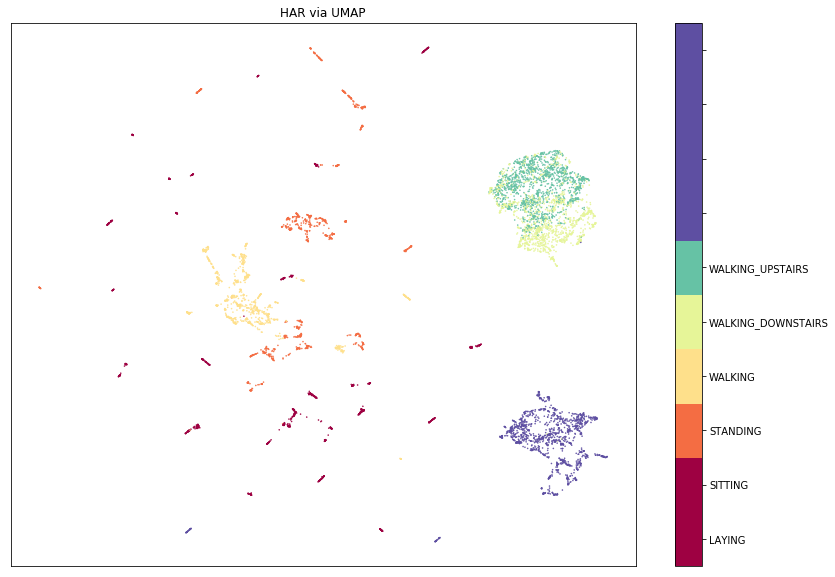

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('HAR via UMAP');

In [39]:
%%time
embedding2 = umap.UMAP(n_neighbors=6).fit_transform(data,y = target)

/home/vinay/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding 4 connected components using meta-embedding (experimental)
  n_components


CPU times: user 36.3 s, sys: 774 ms, total: 37.1 s
Wall time: 26.2 s


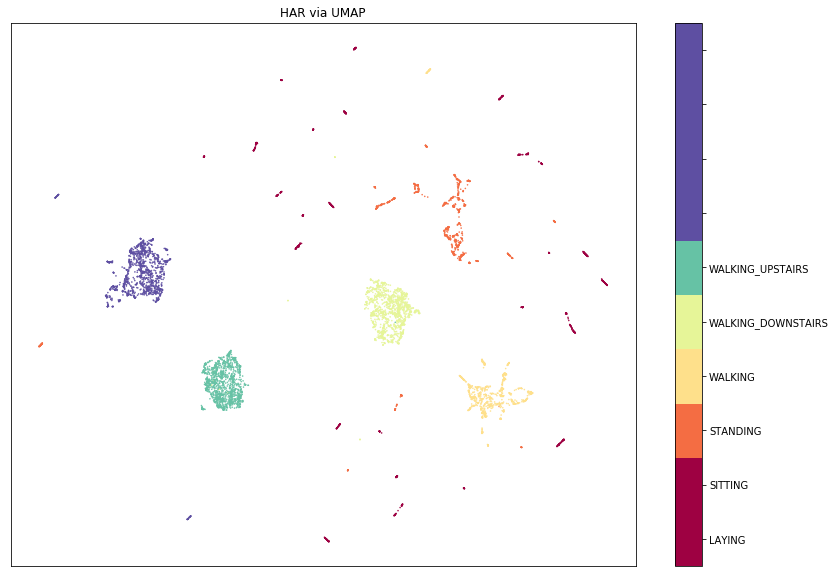

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding2.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('HAR via UMAP');

In [41]:
%%time
embedding2 = umap.UMAP(n_neighbors=15).fit_transform(data,y = target)

CPU times: user 54.4 s, sys: 727 ms, total: 55.2 s
Wall time: 45 s


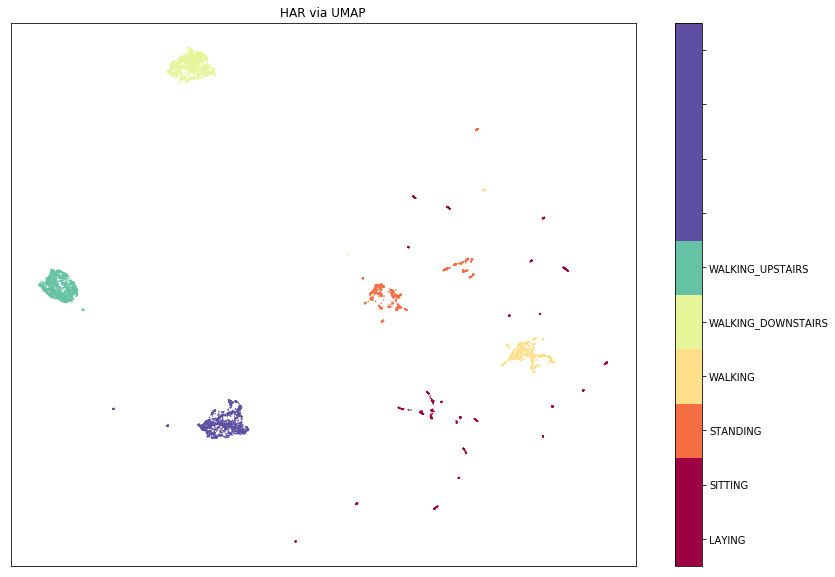

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding2.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('HAR via UMAP');

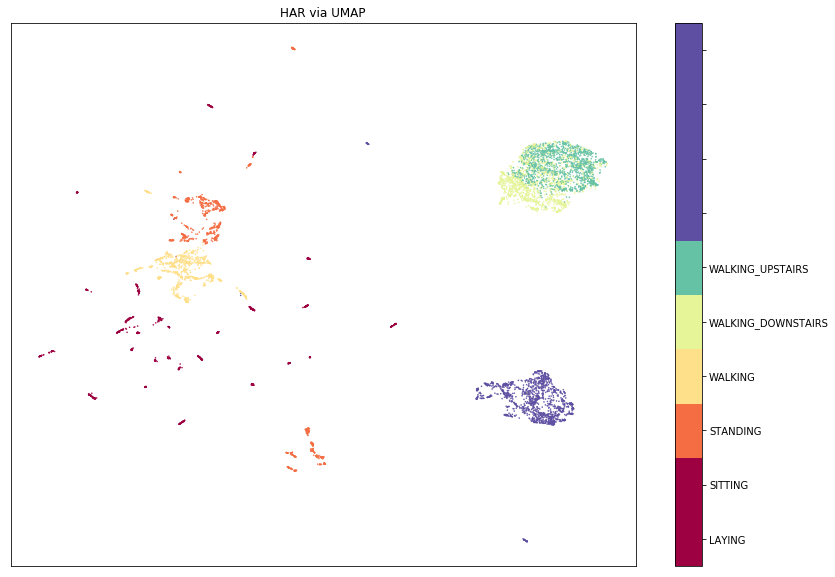

In [45]:
# we cheated a bit .... we gave the supervision ..let's try without it (UMAP IS INCREDABLY FLEXIBLE CHECKOUT
#IT'S DOCS..)


embedding3 = umap.UMAP(n_neighbors=15).fit_transform(data)
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding3.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('HAR via UMAP');

## I haven't changed anything (the default n_neighbours is 15) and we got better or atleast equivalent result(TSNE)

### WHAT IF WE RUN A SIMPLE  CLASSIFEER WITH THIS...

In [46]:
from sklearn.linear_model import LogisticRegression,SGDClassifier

In [ ]:
# clf = SGDClassifier()
# OUT OF CURIOSITY HERE I WILL JUST RUN A CLASSIFIER NO HYPERPARM TUNING.........


In [47]:
clf_embedding = umap.UMAP(n_neighbors=30).fit_transform(data,y = target)

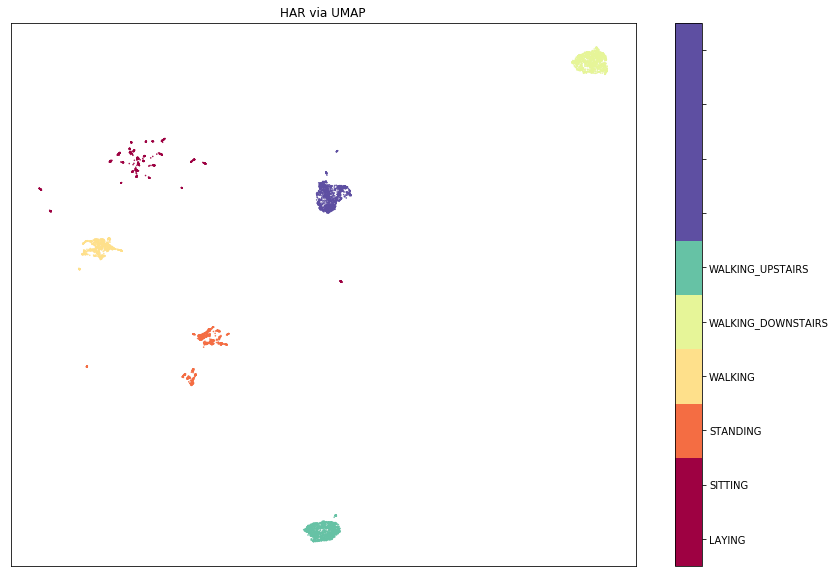

In [56]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*clf_embedding.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('HAR via UMAP'); 

In [49]:
clf = SGDClassifier(loss ='log')

In [52]:
clf.fit(clf_embedding,train.ActivityName)

/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [92]:
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [58]:
y_perd = clf.predict(clf_embedding)

In [61]:
(y_perd != train.ActivityName).sum()

983

In [ ]:
#now let's run the transformed version of data through the same tranditional process.....


In [91]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [63]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# Let's model with our data

### Labels that are useful in plotting confusion matrix

In [64]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function to plot the confusion matrix

In [65]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [66]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

### Method to print the gridsearch Attributes

In [68]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    
    

# 1. Logistic Regression with Grid Search

In [69]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [70]:
new_embedding = umap.UMAP(n_neighbors=20,n_components=30)
xtrn_clf_embedding = new_embedding.fit_transform(data,y = target)

In [72]:
xtst_embedding = new_embedding.transform(X_test)

In [73]:
xtst_embedding.shape,xtrn_clf_embedding.shape

((2947, 30), (7352, 30))

#  run this: see how lg performs with umap

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    2.7s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:03.084065


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.001179


---------------------
|      Accuracy      |
---------------------

    0.9093993892093655


--------------------
| Confusion Matrix |
--------------------

 [[535   1   1   0   0   0]
 [  0 395  92   0   0   4]
 [  0  28 504   0   0   0]
 [  0   0   0 489   7   0]
 [  0   0   0  47 326  47]
 [  0   0   0  34   6 431]]


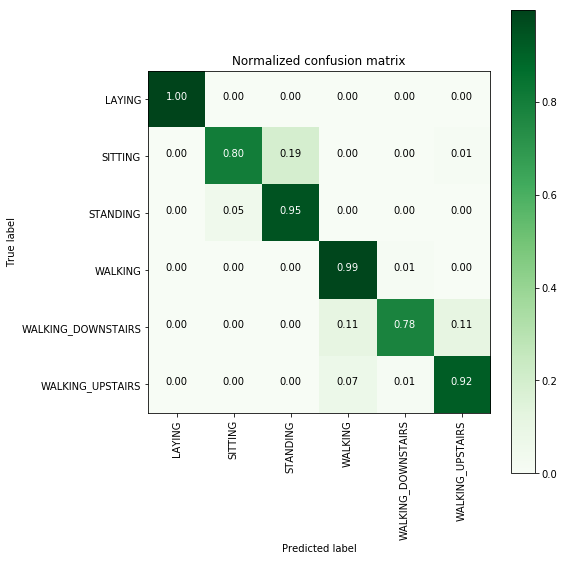

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.93      0.80      0.86       491
          STANDING       0.84      0.95      0.89       532
           WALKING       0.86      0.99      0.92       496
WALKING_DOWNSTAIRS       0.96      0.78      0.86       420
  WALKING_UPSTAIRS       0.89      0.92      0.90       471

       avg / total       0.91      0.91      0.91      2947



In [74]:
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, xtrn_clf_embedding, y_train,xtst_embedding
                                      , y_test, class_labels=labels)

# that's not a good one...as dimensionality reduction is not needed for lr might work well with rf's

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   49.8s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:57.442487


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.002855


---------------------
|      Accuracy      |
---------------------

    0.9630132337970818


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 428  57   0   0   4]
 [  0  11 520   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


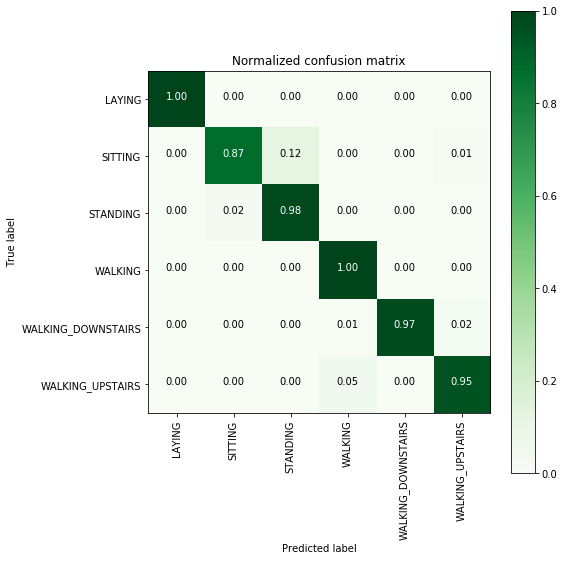

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

       avg / total       0.96      0.96      0.96      2947



In [93]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

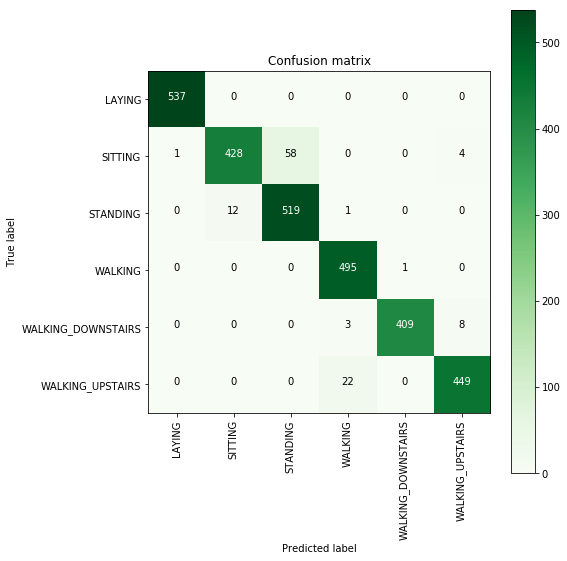

In [13]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [14]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9461371055495104



#  2. Linear SVC with GridSearch

# checkning performance with svc

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.0s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:01.546921


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.000799


---------------------
|      Accuracy      |
---------------------

    0.9090600610790635


--------------------
| Confusion Matrix |
--------------------

 [[535   1   1   0   0   0]
 [  0 394  93   0   0   4]
 [  0  28 504   0   0   0]
 [  0   0   0 489   7   0]
 [  0   0   0  47 326  47]
 [  0   0   0  34   6 431]]


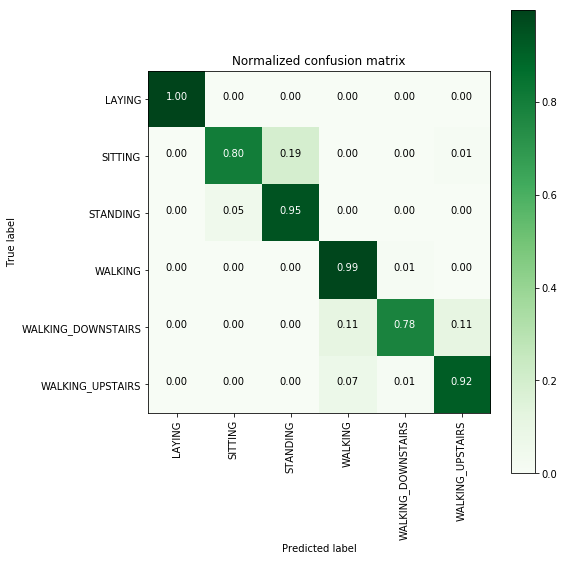

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.93      0.80      0.86       491
          STANDING       0.84      0.95      0.89       532
           WALKING       0.86      0.99      0.92       496
WALKING_DOWNSTAIRS       0.96      0.78      0.86       420
  WALKING_UPSTAIRS       0.89      0.92      0.90       471

       avg / total       0.91      0.91      0.91      2947



In [77]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, xtrn_clf_embedding, y_train,
                                    xtst_embedding, y_test, class_labels=labels)

In [76]:
from sklearn.svm import LinearSVC

# 3.  Kernel SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:01.582311


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.017134


---------------------
|      Accuracy      |
---------------------

    0.9077027485578555


--------------------
| Confusion Matrix |
--------------------

 [[535   1   1   0   0   0]
 [  0 392  92   3   0   4]
 [  0  28 502   2   0   0]
 [  0   0   0 489   7   0]
 [  0   0   0  47 326  47]
 [  0   0   0  34   6 431]]


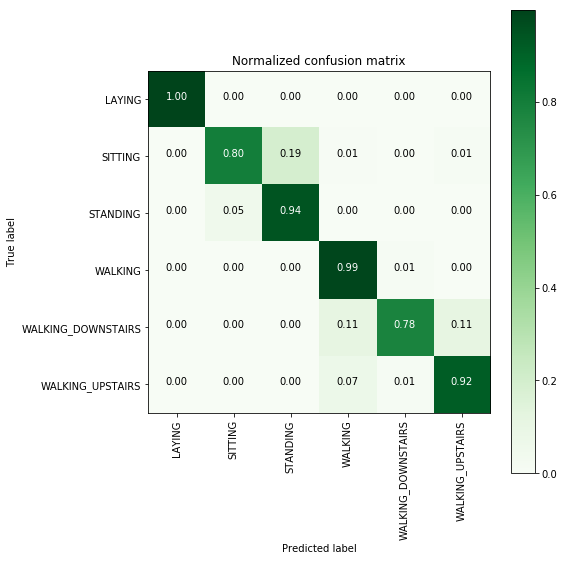

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.93      0.80      0.86       491
          STANDING       0.84      0.94      0.89       532
           WALKING       0.85      0.99      0.91       496
WALKING_DOWNSTAIRS       0.96      0.78      0.86       420
  WALKING_UPSTAIRS       0.89      0.92      0.90       471

       avg / total       0.91      0.91      0.91      2947



In [94]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, xtrn_clf_embedding, y_train,xtst_embedding, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:05:46.182889


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:05.221285


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


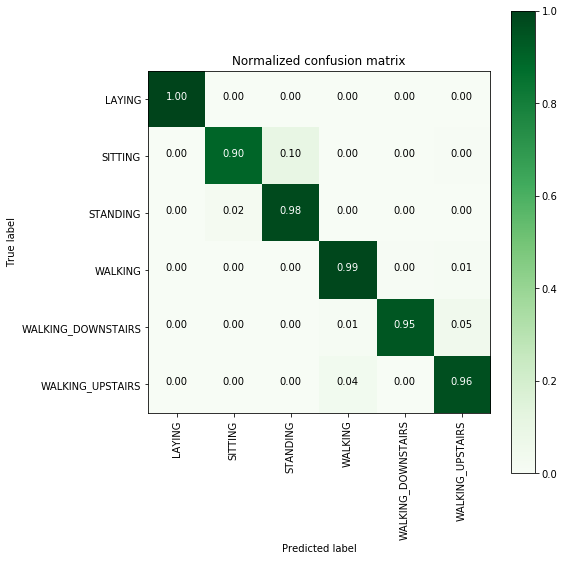

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

       avg / total       0.96      0.96      0.96      2947



In [18]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [19]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9440968443960827



# 5. Random Forest Classifier with GridSearch

# checking random forest performance

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:28.618355


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.008548


---------------------
|      Accuracy      |
---------------------

    0.9080420766881574


--------------------
| Confusion Matrix |
--------------------

 [[535   1   1   0   0   0]
 [  0 393  92   2   0   4]
 [  0  28 502   2   0   0]
 [  0   0   0 489   7   0]
 [  0   0   0  47 326  47]
 [  0   0   0  34   6 431]]


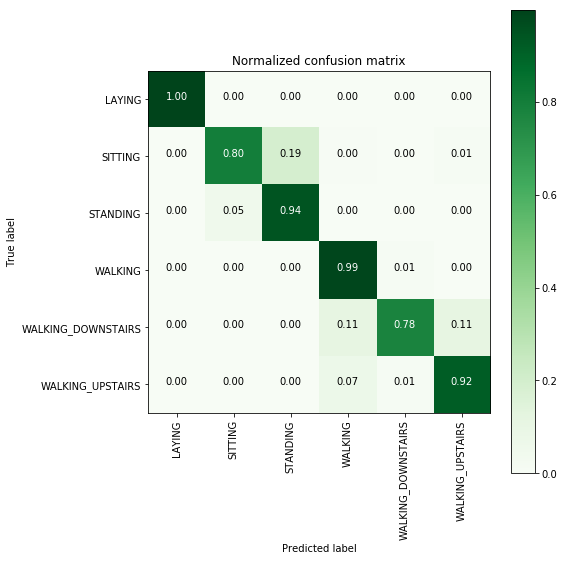

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.93      0.80      0.86       491
          STANDING       0.84      0.94      0.89       532
           WALKING       0.85      0.99      0.91       496
WALKING_DOWNSTAIRS       0.96      0.78      0.86       420
  WALKING_UPSTAIRS       0.89      0.92      0.90       471

       avg / total       0.91      0.91      0.91      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False

In [78]:
%%time

from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, xtrn_clf_embedding, y_train, xtst_embedding,
                                 y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

In [ ]:
# check out the average cross-validation scores of best estimator - 99.986 and accuracy is 90.

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:03:06.321964


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.068438


---------------------
|      Accuracy      |
---------------------

    0.9277231082456736


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 436  55   0   0   0]
 [  0  38 494   0   0   0]
 [  0   0   0 480   7   9]
 [  0   0   0  21 355  44]
 [  0   0   0  31   8 432]]


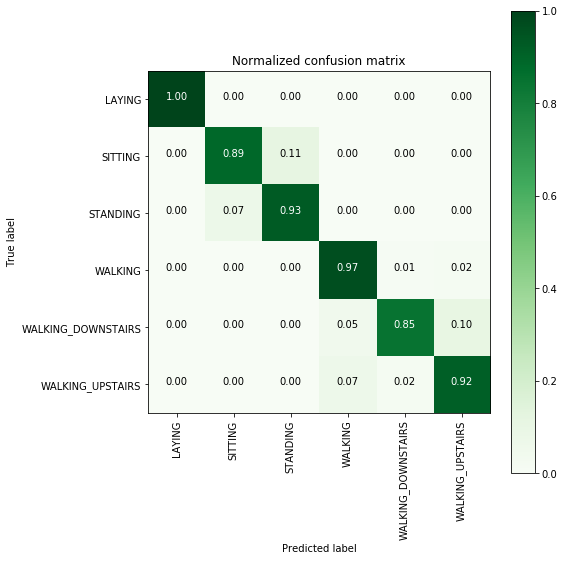

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.89      0.90       491
          STANDING       0.90      0.93      0.91       532
           WALKING       0.90      0.97      0.93       496
WALKING_DOWNSTAIRS       0.96      0.85      0.90       420
  WALKING_UPSTAIRS       0.89      0.92      0.90       471

       avg / total       0.93      0.93      0.93      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=Fal

In [97]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

In [99]:
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rfc.fit(X_train,y_train)
rfc.feature_importances_

array([  2.25291721e-04,   2.43991724e-04,   8.56388036e-05,
         6.33472210e-03,   2.45105624e-04,   4.52295823e-04,
         4.84687985e-03,   2.34876373e-04,   3.63038735e-04,
         7.68563233e-03,   2.57141135e-04,   1.77519703e-04,
         3.58060741e-04,   1.25876628e-04,   2.14730895e-04,
         8.41283795e-04,   4.30262963e-03,   4.50018742e-04,
         1.68641842e-04,   1.30679633e-03,   4.85637027e-04,
         2.26464029e-04,   1.40048801e-03,   1.71768097e-04,
         3.73748602e-04,   3.95862822e-04,   1.39574348e-04,
         1.70501122e-04,   1.99450066e-04,   2.24552388e-04,
         1.68403037e-04,   1.25235039e-04,   2.37233530e-04,
         2.21768583e-04,   1.13939566e-04,   1.69002978e-04,
         1.88451035e-04,   6.26648936e-03,   9.36420401e-04,
         1.27143022e-03,   3.17835650e-02,   2.41587608e-02,
         9.05275177e-03,   2.06646197e-03,   5.75825218e-04,
         6.15816225e-04,   1.20138132e-03,   1.25750924e-03,
         4.94710734e-04,

In [102]:
feat = rfc.feature_importances_.reshape(1,561)

In [105]:
feat_imp = pd.DataFrame(list(feat),columns=data.columns)

In [108]:
feat_imp

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
0,0.000225,0.000244,0.000086,0.006335,0.000245,0.000452,0.004847,0.000235,0.000363,0.007686,...,0.000142,0.000373,0.000412,0.000156,0.0001,0.00045,0.000437,0.02671,0.026691,0.009325


In [110]:
sorted(list(zip(rfc.feature_importances_,data.columns)),key = lambda x:x[0],reverse=True)[:4]

[(0.031783564996900028, 'tGravityAccmeanX'),
 (0.030605860223742905, 'tGravityAccenergyX'),
 (0.029946784459326161, 'tGravityAccminX'),
 (0.027197627247556717, 'tGravityAccmaxX')]

# most important features....

# <span class="girk">The conclusion is logistic regression is most suitable for the problem and random forest can be used for feature importance</span>

# Let's run boosting without any dimensionality reduction:This is for fun not part of the analysis.

In [81]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

'STANDING'

In [83]:
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.Activity

X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.Activity

In [85]:
X_test.shape,X_train.shape

((2947, 561), (7352, 561))

In [86]:
y_train[0]

5

## this is a new library from yandex ...tweaking hyperameters is hard but i like there plottig functionality so let's try out for fun

In [90]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score


# model = CatBoostClassifier(
#     custom_loss=['MultiClass'],
#     random_seed=42,
#     logging_level='Silent'
# )

from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=2, learning_rate=1, depth=2)

model.fit(
    X_train, y_train,

    eval_set=(X_test, y_test),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8977633	test: 0.8737611	best: 0.8737611 (0)	total: 99.2ms	remaining: 99.2ms
1:	learn: 0.5848235	test: 0.5872162	best: 0.5872162 (1)	total: 140ms	remaining: 0us

bestTest = 0.5872161994
bestIteration = 1



# Conclusion :

In the real world, domain-knowledge, EDA and feature-engineering matter most.